In [38]:
import pandas as pd
import numpy as np

# Plotting and correlation
import matplotlib.pyplot as plt
import seaborn as sns

# Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')


**Load data**

In [35]:
fuel_types = ['electric','plug-in hybrid electric','fuel cell','diesel','flex fuel','gasoline','gasoline hybrid','natural gas','propane']

df = pd.read_csv('data/yearly_all_data.csv')
df.drop(['Unnamed: 0.1','Unnamed: 0'], axis=1, inplace=True)

print(f"shape: {df.shape}")
df.head()

shape: (7, 12)


,year,electric,plug-in hybrid electric,fuel cell,diesel,flex fuel,gasoline,gasoline hybrid,natural gas,propane,emissions,demand
0,2021,522445,305315,10127,590216,1208970,25998618,1298275,8461,90,53203603.23,269006652
1,2020,369364,259109,7129,700366,1144536,25021380,1155477,7676,897,49626238.88,268529517
2,2019,308447,251522,6933,680622,1131474,25526368,1114944,8462,1015,51049895.52,264368288
3,2018,232239,216328,5525,657857,1122312,25377093,1060166,8910,1063,53938026.76,275818547
4,2017,159705,163057,3271,640281,1108886,25313468,1019085,9212,1074,52856896.33,284621714


**Correlation**

<AxesSubplot: >

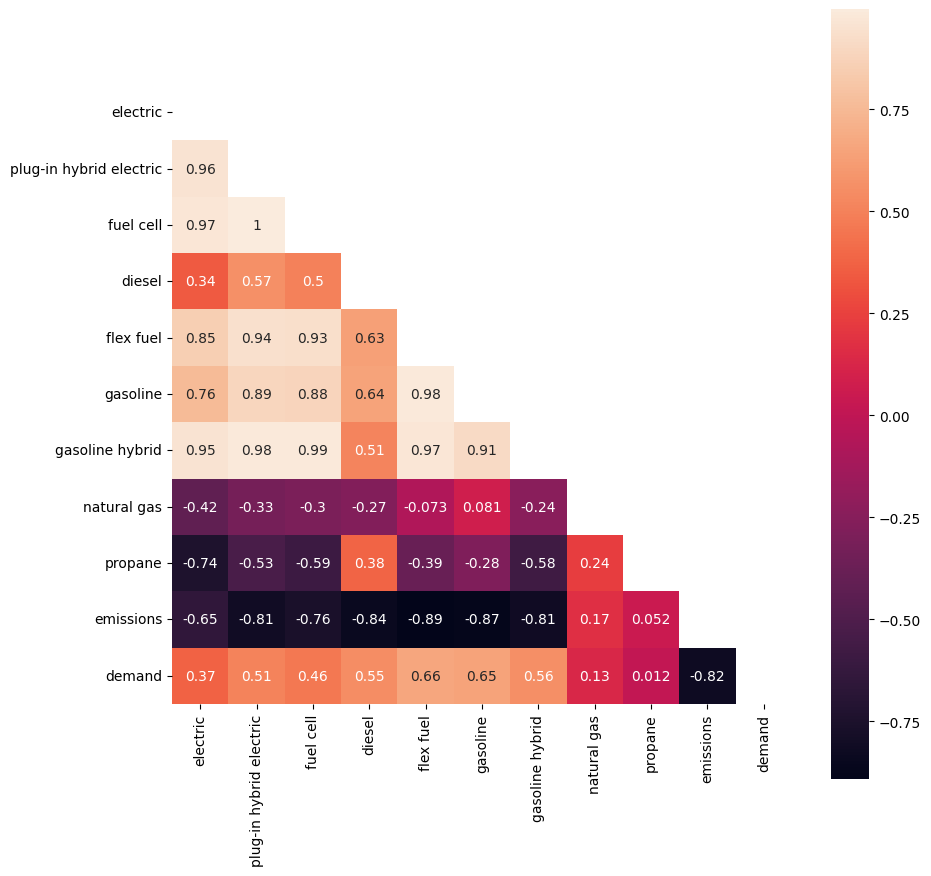

In [36]:
df = df.drop(['year'], axis=1)
correlation = df.corr(method = 'pearson')
plt.subplots(figsize = (10,10))
masked = np.triu(np.ones_like(correlation, dtype=bool)) 
sns.heatmap(correlation,mask=masked,square = True, annot = True)

**Model**

In [42]:
models = {}

for fuel in fuel_types:
    if fuel != 'electric':
        X_removal_list = fuel_types.copy()
        X_removal_list.remove('electric')
        X_removal_list.append('emissions')
        X_removal_list.append('demand')

        y_removal_list = fuel_types.copy()
        y_removal_list.remove(fuel)
        y_removal_list.append('emissions')
        y_removal_list.append('demand')

        X = df.drop(columns=X_removal_list)
        y = df.drop(columns=y_removal_list)
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
        distribution = {
         'n_estimators': [5,10,20,30,50,100,200] ,  
         'max_features': ['log2','auto', 'sqrt'],
         'max_depth': [3,5,7,9,12] ,
         'min_samples_split': [2,4,6,8,10,15,20,30] ,
         'min_samples_leaf': [1,3,4,6,10,15,17],
       }

        forest = RandomForestRegressor()

        random_rf = RandomizedSearchCV(estimator = forest, param_distributions = distribution, n_iter=40)                      
        random_rf.fit(X_train,  y_train)

        print(f'Electric and {fuel}')
        print(f'Training data score: {random_rf.score(X_train,  y_train)}; testing data score: {random_rf.score(X_test, y_test)}\n')

        models[fuel] = random_rf

KeyError: "['year'] not found in axis"